In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')


In [5]:
insurance_dataset=pd.read_csv('/kaggle/input/insurance1/insurance.csv')

In [6]:
#loading the first 5 dataset using head()
insurance_dataset.head(10) # If you want first 10 rows then mention this as head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [7]:
#to print the last 5 dateset use tail()
insurance_dataset.tail(10) # If you want last 10 rows then mention this as tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [8]:
#to find the no. of rows and column
insurance_dataset.shape

(1338, 7)

In [9]:
#Information about dataset structure
insurance_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
#check for missing values
#--- incase null values are found then the decision need to be taken to drop the rows or the entire columns
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
#statistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


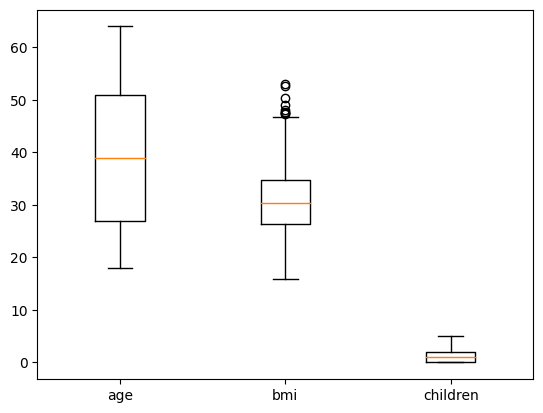

In [12]:
#insurance_dataset['age'].plot(kind='box', title='Insurance Info')
labels = ['age', 'bmi', 'children']
B = plt.boxplot([insurance_dataset['age'], insurance_dataset['bmi'], insurance_dataset['children']], labels=labels)
plt.show()

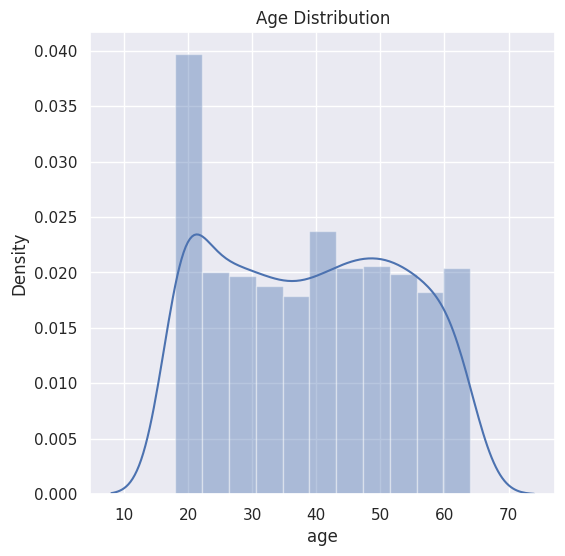

In [13]:
#distribution of the age
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

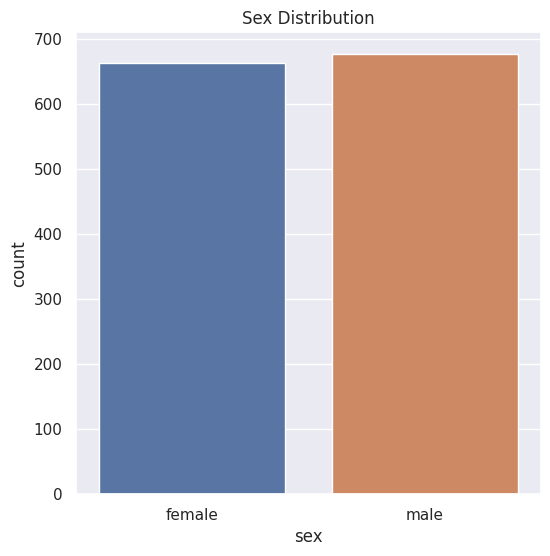

In [14]:
#gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [15]:
#Value count based on the gender
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

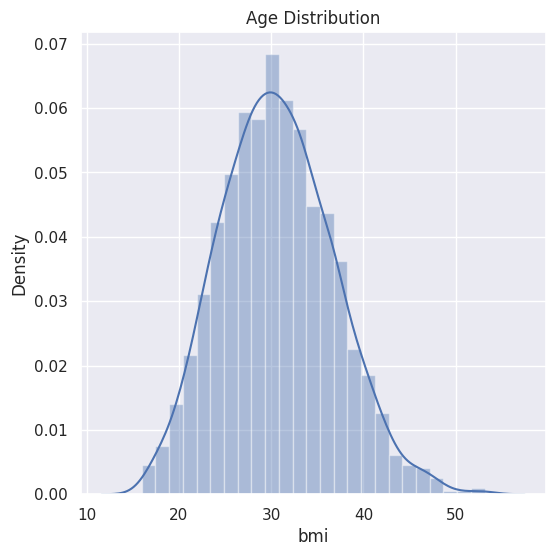

In [16]:
#BMI Distribution
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('Age Distribution')
plt.show()

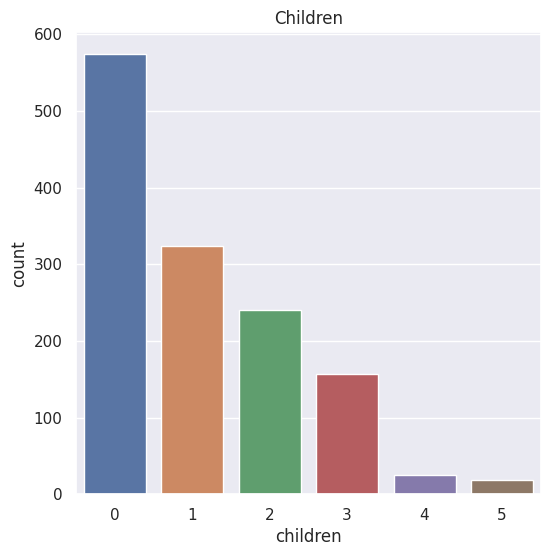

In [17]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset)
plt.title('Children')
plt.show()


In [18]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

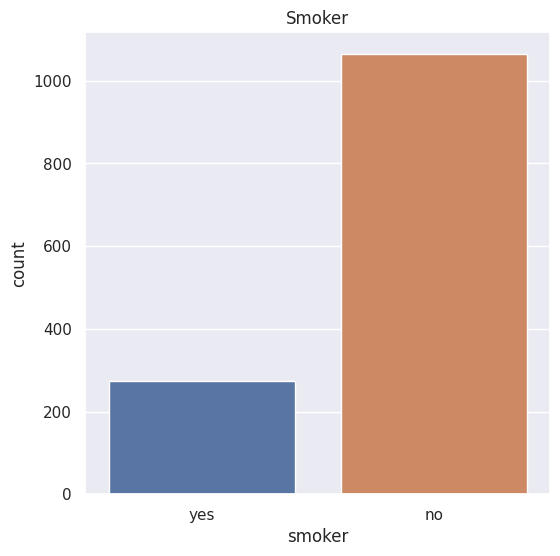

In [19]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title('Smoker')
plt.show()

In [20]:
#value count based on smoker or not 
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

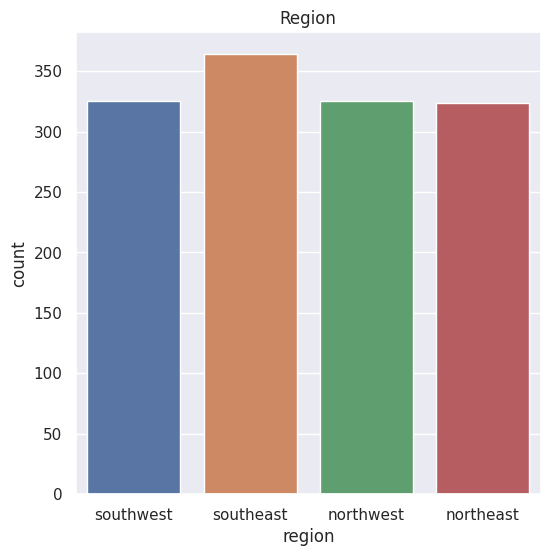

In [21]:
#region column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset)
plt.title('Region')
plt.show()


In [22]:
#value count base on the region 
insurance_dataset['region'].value_counts()


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

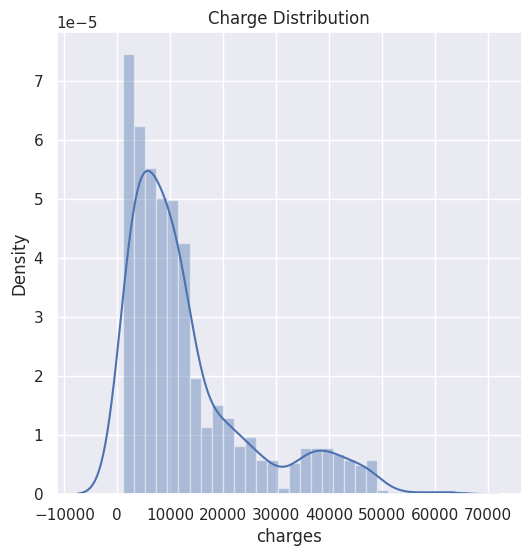

In [23]:
#distribution of 'charges' value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('Charge Distribution')
plt.show()

In [24]:
# DATA PREPROCESSING
# Encoding the categorical data

In [25]:
#encoding 'sex' column
insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)
#encoding 'smoker' column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)
#encoding 'region' column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [26]:
print(insurance_dataset)

      age  sex     bmi  children  smoker  region      charges
0      19    1  27.900         0       0       1  16884.92400
1      18    0  33.770         1       1       0   1725.55230
2      28    0  33.000         3       1       0   4449.46200
3      33    0  22.705         0       1       3  21984.47061
4      32    0  28.880         0       1       3   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    0  30.970         3       1       3  10600.54830
1334   18    1  31.920         0       1       2   2205.98080
1335   18    1  36.850         0       1       0   1629.83350
1336   21    1  25.800         0       1       1   2007.94500
1337   61    1  29.070         0       0       3  29141.36030

[1338 rows x 7 columns]


In [27]:
X=insurance_dataset.drop(columns='charges',axis=1)
Y=insurance_dataset['charges']

In [28]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [29]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [30]:
#Splitting the training and testing data
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.2, random_state=2)

In [31]:
print(X_test)

      age  sex     bmi  children  smoker  region
17     23    0  23.845         0       1       2
1091   55    1  29.830         0       1       2
273    50    0  27.455         1       1       2
270    18    0  29.370         1       1       0
874    44    0  21.850         3       1       2
...   ...  ...     ...       ...     ...     ...
232    19    1  17.800         0       1       1
323    57    0  40.945         0       1       2
1337   61    1  29.070         0       0       3
1066   48    0  37.290         2       1       0
966    51    0  24.795         2       0       3

[268 rows x 6 columns]


In [32]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [33]:
print(Y.shape,Y_train.shape,Y_test.shape)

(1338,) (1070,) (268,)


In [34]:
# TRAINING THE MODEL

In [35]:
#Loading the Linear Regression Model
regressor=LinearRegression()

In [36]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [37]:
#Model Evaluation

In [38]:
#prediction on training data
training_data_prediction=regressor.predict(X_train)

In [39]:
# R squared value for training data
r2_train=metrics.r2_score(Y_train,training_data_prediction)
print("R-squared value",r2_train)

R-squared value 0.751505643411174


In [40]:
#prediction on testing data
testing_data_prediction=regressor.predict(X_test)

In [41]:
# R squared value for testing data
r2_test=metrics.r2_score(Y_test,testing_data_prediction)
print("R-squared value",r2_test)

R-squared value 0.7447273869684076


In [42]:
#Building a predictive system

In [43]:
input_data=(31,1,25.74,0,1,0)
#changing input_data to a numpy array
input_data_array=np.asarray(input_data)
print(input_data_array)
#Reshaping the array
input_data_reshaped=input_data_array.reshape(1,-1)
print(input_data_reshaped)
prediction=regressor.predict(input_data_reshaped)
print(prediction)
print("The insurance cost is USD",prediction[0])


[31.    1.   25.74  0.    1.    0.  ]
[[31.    1.   25.74  0.    1.    0.  ]]
[3760.0805765]
The insurance cost is USD 3760.080576496057


In [44]:
# TASK 1: Test the relationship between Independent Variable and Dependent Variable 
# TASK 2: Test the collinearity between each of the independent variables 
#using Linear regression 

## TASK-1

In [45]:
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


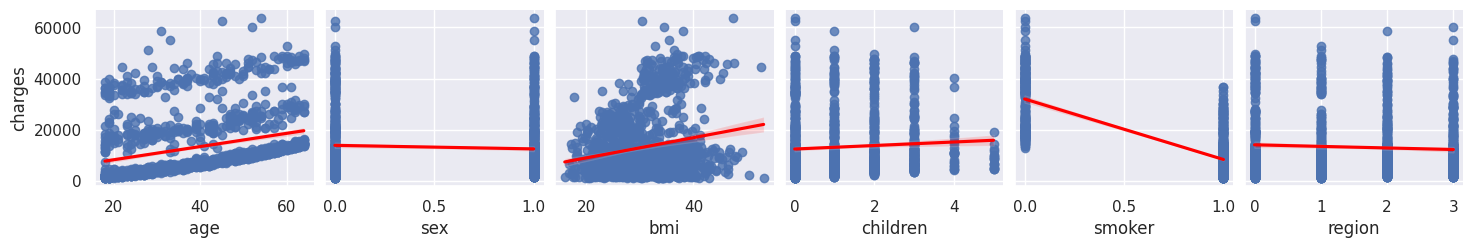

In [54]:
sns.pairplot(insurance_dataset, x_vars=['age', 'sex', 'bmi', 'children', 'smoker', 'region'], y_vars=['charges'], kind='reg', plot_kws={'line_kws':{'color':'red'}})

Observations:

1. age: pos lin rel
2. sex: constant lin rel
3. bmi: pos lin rel
4. children: pos lin rel
5. smoker: neg lin rel
6. region: const lin rel

## Task2

In [55]:
corr_mat = insurance_dataset.corr()

<Axes: >

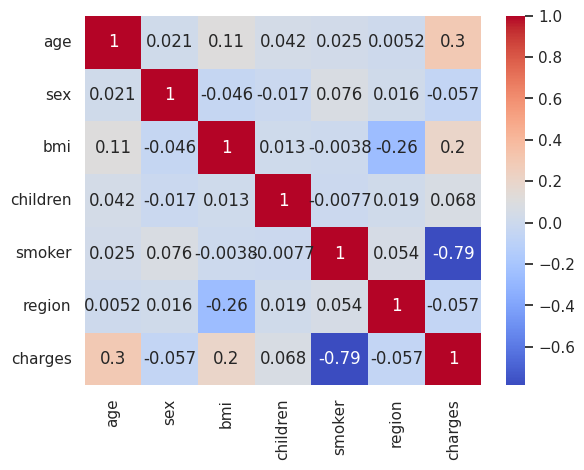

In [56]:
sns.heatmap(corr_mat, cmap='coolwarm', annot=True)

Observations:
1. All independent variables wrt charges are also independent wrt each other.
2. From correlation matrix it is clear that smoker makes the major changes, but it itself is not enough to get nice results, the whole lot is required to get the max accuracy and efficient predictions.